In [1]:
import cv2
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
import math
from preprocessors.bilateral_filter import bilateral_filter
from preprocessors.gaussian_blur import gaussian_blur
from preprocessors.noise_reduction import denoise_image
from preprocessors.average_blur import layered_average_blur
from preprocessors.isolate_intensity import isolate_intensity
from preprocessors.edge_detection import edge_detection
from preprocessors.hough_transform import hough_transform
import os
import pandas as pd

In [2]:
data_path = '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data'
file_path =  '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_150_G0/75.png'

In [3]:
# Load png at file_path as a numpy array
def load_image(file_path):
    return np.asarray(cv2.imread(file_path, cv2.IMREAD_GRAYSCALE))

In [4]:
# Get all folders in data_path
def get_folders(data_path):
    return [os.path.join(data_path,f) for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Get all subfolders in data_path
def get_subfolders(data_path):
    return [os.path.join(data_path,f) for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Get all files in data_path
def get_files(data_path):
    # [os.path.join(data_path,f) for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.endswith('.png')]
    all_files = []
    for f in os.listdir(data_path):
        if os.path.isfile(os.path.join(data_path, f)) and f.endswith('.png'):
            all_files.append(os.path.join(data_path, f))

    # Get 10 equispaced files
    file_indexes = np.linspace(0, len(all_files)-1, 10, dtype=int)
    selected_files = [all_files[i] for i in file_indexes]
    return selected_files



In [5]:
folders = get_folders(data_path)
folders

['/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW190',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW191',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW196',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW128',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW188',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW174',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW192']

In [6]:
subfolders = []
for folder in folders:
    subfolders += get_subfolders(folder)
subfolders

['/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141/WW114_125_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141/WW114_150_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141/WW114_175_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141/WW114_100_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW141/WW114_125_GP10',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_150_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_125_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_100_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_175_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW112/WW112_125_GP10',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW190/WW190_150_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW190/WW190_125_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW190/WW190_100_G0',
 '/Users/aarjavjain/Desktop/Education/Y4/PRJ/data/WW190/WW190_175_G0',
 '

In [7]:
# Get all files in all folders
# files = []
for subfolder in subfolders:
    files = get_files(subfolder)
    print(len(files))
# len(files)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


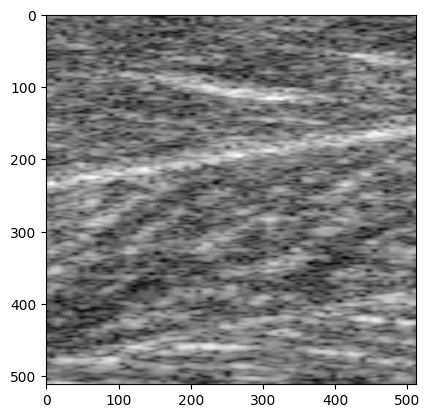

In [4]:
frame = load_image(file_path)
# flip the image along the y-axis
frame = cv2.flip(frame, 1)
plt.imshow(frame, cmap='gray')

In [5]:
# frame_gaussian = gaussian_blur(frame)
# frame_bilateral = bilateral_filter(frame)
# frame_average = layered_average_blur(frame)
frame_denoised = denoise_image(frame)


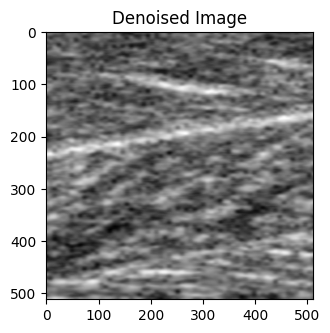

In [6]:
plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(frame, cmap='gray')
# plt.title('Original')
# plt.subplot(1, 5, 2)
# plt.imshow(frame_gaussian, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 3)
# plt.imshow(frame_bilateral, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 4)
# plt.imshow(frame_average, cmap='gray')
# plt.title('Layered Average Blur')
plt.subplot(1, 5, 5)
plt.imshow(frame_denoised, cmap='gray')
plt.title('Denoised Image')
plt.show()

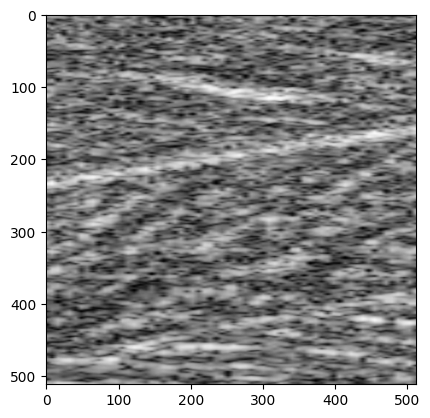

In [69]:
def CLAHE(frame):
    clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(18, 18))
    return clahe.apply(frame.astype(np.uint8))

frame_clahe = CLAHE(frame)
plt.imshow(frame_clahe, cmap='gray')

In [107]:
import numpy as np
import cv2

def calculate_snr(image, roi=None):
    if roi is not None:
        signal = image[roi[0]:roi[1], roi[2]:roi[3]]
    else:
        signal = image
    mu_signal = np.mean(signal)
    sigma_noise = np.std(image - mu_signal)
    snr = mu_signal / sigma_noise
    return snr

def calculate_cnr(image, roi1, roi2):
    signal1 = image[roi1[0]:roi1[1], roi1[2]:roi1[3]]
    signal2 = image[roi2[0]:roi2[1], roi2[2]:roi2[3]]
    mu_signal1 = np.mean(signal1)
    mu_signal2 = np.mean(signal2)
    sigma_noise = np.std(image - (mu_signal1 + mu_signal2) / 2)
    cnr = abs(mu_signal1 - mu_signal2) / sigma_noise
    return cnr

# Load images (grayscale)

# Define ROIs as (start_row, end_row, start_col, end_col)
# (0,0) is the top-left corner
# (512, 0) is the top-right corner
# (0, 240) is the bottom-left corner
# (512, 190) is the bottom-right corner
roi_signal = (0, 256, 0, 512) # Example ROI for SNR
roi1 = (10, 50, 10, 50) # Example ROI1 for CNR
roi2 = (60, 100, 60, 100) # Example ROI2 for CNR

# Scale frame_average up to original size
frame_average_resize = cv2.resize(frame_average, (512, 512))

# Calculate SNR and CNR for both images
snr_noisy = calculate_snr(frame, roi_signal)
snr_denoised = calculate_snr(frame_average_resize, roi_signal)
# Print results
print(f"SNR Change - average: {snr_denoised - snr_noisy}")
# Calculate SNR and CNR for both images
snr_noisy = calculate_snr(frame, roi_signal)
snr_denoised = calculate_snr(frame_gaussian, roi_signal)
# Print results
print(f"SNR Change - gaussian: {snr_denoised - snr_noisy}")
# Calculate SNR and CNR for both images
snr_noisy = calculate_snr(frame, roi_signal)
snr_denoised = calculate_snr(frame_bilateral, roi_signal)
# Print results
print(f"SNR Change - bilateral: {snr_denoised - snr_noisy}")
# Calculate SNR and CNR for both images
snr_noisy = calculate_snr(frame, roi_signal)
snr_denoised = calculate_snr(frame_denoised, roi_signal)
# Print results
print(f"SNR Change - denoised: {snr_denoised - snr_noisy}")


SNR Change - average: 2.1073803334445262
SNR Change - gaussian: 0.10990234175582358
SNR Change - bilateral: 0.4984690954994173
SNR Change - denoised: -0.5517134325318418


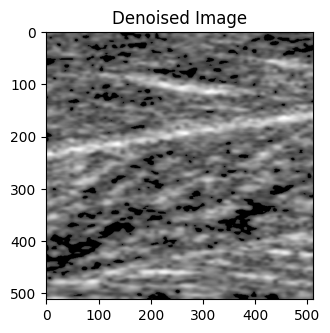

In [7]:
# isolated_gaussian_q1 = isolate_intensity(frame_gaussian, 'q1')
# isolated_bilateral_q1 = isolate_intensity(frame_bilateral, 'q1')
# isolated_average_q1 = isolate_intensity(frame_average, 'q1')
# isolated_denoised_q1 = isolate_intensity(frame_denoised, 'q1')

# isolated_gaussian_ami = isolate_intensity(frame_gaussian, 'avg_min_intensity')
# isolated_bilateral_ami = isolate_intensity(frame_bilateral, 'avg_min_intensity')
# isolated_average_ami = isolate_intensity(frame_average, 'avg_min_intensity')
isolated_denoised_ami = isolate_intensity(frame_denoised, 'avg_min_intensity')

# plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(isolated_gaussian_q1, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(isolated_bilateral_q1, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(isolated_average_q1, cmap='gray')
# plt.title('Layered Average Blur')
# plt.subplot(1, 5, 4)
# plt.imshow(isolated_denoised_q1, cmap='gray')
# plt.title('Denoised Image')
# plt.show()

plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(isolated_gaussian_ami, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(isolated_bilateral_ami, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(isolated_average_ami, cmap='gray')
# plt.title('Layered Average Blur')
plt.subplot(1, 5, 4)
plt.imshow(isolated_denoised_ami, cmap='gray')
plt.title('Denoised Image')
plt.show()




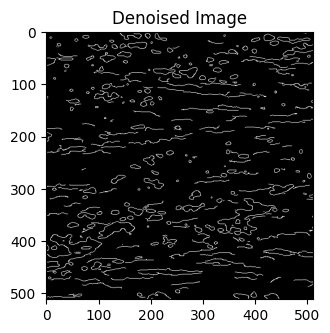

In [8]:
def edge_detection(im):
    edges = cv2.Canny(im.astype('uint8'), 50, 150)
    return edges

# edges_gaussian_q1 = edge_detection(isolated_gaussian_q1)
# edges_bilateral_q1 = edge_detection(isolated_bilateral_q1)
# edges_average_q1 = edge_detection(isolated_average_q1)
# edges_denoised_q1 = edge_detection(isolated_denoised_q1)

# plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(edges_gaussian_q1, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(edges_bilateral_q1, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(edges_average_q1, cmap='gray')
# plt.title('Layered Average Blur')
# plt.subplot(1, 5, 4)
# plt.imshow(edges_denoised_q1, cmap='gray')
# plt.title('Denoised Image')
# plt.show()

# edges_gaussian_ami = edge_detection(isolated_gaussian_ami)
# edges_bilateral_ami = edge_detection(isolated_bilateral_ami)
# edges_average_ami = edge_detection(isolated_average_ami)
edges_denoised_ami = edge_detection(isolated_denoised_ami)

plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(edges_gaussian_ami, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(edges_bilateral_ami, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(edges_average_ami, cmap='gray')
# plt.title('Layered Average Blur')
plt.subplot(1, 5, 4)
plt.imshow(edges_denoised_ami, cmap='gray')
plt.title('Denoised Image')
plt.show()

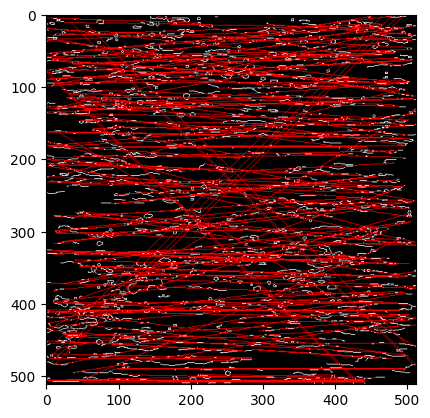

In [100]:
min_line_length = frame_gaussian.shape[1]//3
max_line_gap = frame_gaussian.shape[1]//5

lines = cv2.HoughLinesP(edges_gaussian_ami, 1, np.pi/180, threshold=50, minLineLength=min_line_length, maxLineGap=max_line_gap)
lines2 = cv2.HoughLinesP(edges_gaussian_ami, 1, np.pi/180, threshold=50, minLineLength=min_line_length, maxLineGap=max_line_gap)

# Draw the lines on a copy of the original image
aponeuroses = edges_gaussian_ami.copy().astype('uint8')
# Convert to 3 channels
aponeuroses = cv2.cvtColor(aponeuroses, cv2.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(aponeuroses, cmap='gray')

(-0.5, 511.5, 511.5, -0.5)

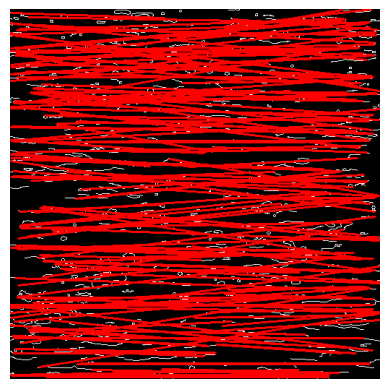

In [101]:
def filter_lines_by_angle(lines, angle_min, angle_max):
    filtered_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            angle = math.atan2(y2 - y1, x2 - x1) * 180.0 / np.pi
            if angle_min <= angle <= angle_max:
                filtered_lines.append(line)
    return filtered_lines

filtered_lines = filter_lines_by_angle(lines, -10, 10)

# show the filtered lines on a copy of the original image
aponeuroses_filtered = edges_gaussian_ami.copy().astype('uint8')
# Convert to 3 channels
aponeuroses_filtered = cv2.cvtColor(aponeuroses_filtered, cv2.COLOR_GRAY2BGR)
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses_filtered, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(aponeuroses_filtered, cmap='gray')
plt.axis('off')

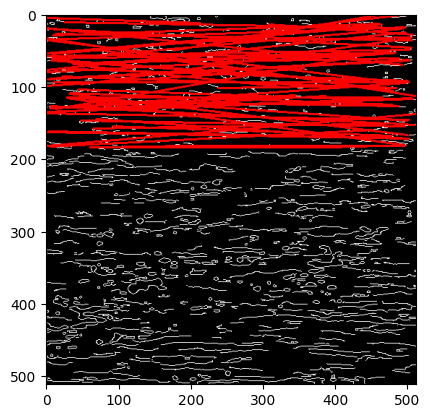

In [103]:
def filter_lines_by_y(lines, y_min):
    filtered_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if y1 < y_min and y2 < y_min:
                filtered_lines.append(line)
    return filtered_lines

filtered_lines = filter_lines_by_y(filtered_lines, 190)

# show the filtered lines on a copy of the original image
aponeuroses_filtered = edges_gaussian_ami.copy().astype('uint8')
# Convert to 3 channels
aponeuroses_filtered = cv2.cvtColor(aponeuroses_filtered, cv2.COLOR_GRAY2BGR)
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses_filtered, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(aponeuroses_filtered, cmap='gray')

20


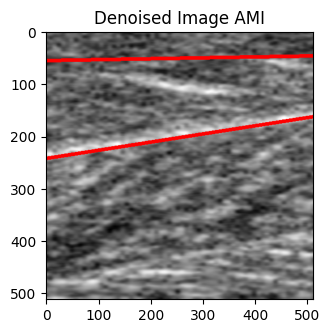

In [9]:
# visualisation_gaussian_q1, gaussian_q1_line_d, gaussian_q1_line_s = hough_transform(edges_gaussian_q1, visualise=frame_gaussian)
# visualisation_bilateral_q1, bilateral_q1_line_d, bilateral_q1_line_s = hough_transform(edges_bilateral_q1, visualise=frame_bilateral)
# visualisation_average_q1, average_q1_line_d, average_q1_line_s = hough_transform(edges_average_q1, visualise=frame_average, threshold=6)
# visualisation_denoised_q1, denoised_q1_line_d, denoised_q1_line_s = hough_transform(edges_denoised_q1, visualise=frame_denoised)

# plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(visualisation_gaussian_q1, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(visualisation_bilateral_q1, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(visualisation_average_q1, cmap='gray')
# plt.title('Layered Average Blur')
# plt.subplot(1, 5, 4)
# plt.imshow(visualisation_denoised_q1, cmap='gray')
# plt.title('Denoised Image Q1')
# plt.show()

# visualisation_gaussian_ami, gaussian_ami_line_d, gaussian_ami_line_s = hough_transform(edges_gaussian_ami, visualise=frame_gaussian)
# visualisation_bilateral_ami, bilateral_ami_line_d, bilateral_ami_line_s = hough_transform(edges_bilateral_ami, visualise=frame_bilateral)
# visualisation_average_ami, average_ami_line_d, average_ami_line_s = hough_transform(edges_average_ami, visualise=frame_average, threshold=6)
visualisation_denoised_ami, denoised_ami_line_d, denoised_ami_line_s = hough_transform(edges_denoised_ami, visualise=frame_denoised)

plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(visualisation_gaussian_ami, cmap='gray')
# plt.title('Gaussian Blur')
# plt.subplot(1, 5, 2)
# plt.imshow(visualisation_bilateral_ami, cmap='gray')
# plt.title('Bilateral Filter')
# plt.subplot(1, 5, 3)
# plt.imshow(visualisation_average_ami, cmap='gray')
# plt.title('Layered Average Blur')
plt.subplot(1, 5, 4)
plt.imshow(visualisation_denoised_ami, cmap='gray')
plt.title('Denoised Image AMI')
plt.show()

In [21]:
# Get the 4 coordinates of the quadrilateral
def get_quadrilateral_coordinates(line_d, line_s, width):
    # Line is represented as (slope, intercept)
    
    slope_d, intercept_d = line_d
    slope_s, intercept_s = line_s

    # if nonetype return []
    if slope_d is None or intercept_d is None or slope_s is None or intercept_s is None:
        return []

    # Get the 4 points of the quadrilateral
    x1 = 0
    y1 = int(intercept_d)
    x2 = width
    y2 = int(slope_d * x2 + intercept_d)
    x3 = 0
    y3 = int(intercept_s)
    x4 = width
    y4 = int(slope_s * x4 + intercept_s)
    return [[x3, y3],[x4, y4], [x2, y2], [x1, y1]]

In [20]:
def extract_coordinates(frame_path, technique, method, flip=False):
    original_frame = load_image(frame_path)
    frame = original_frame.copy()
    if flip:
        frame = cv2.flip(frame, 1)
    if technique == 'gaussian':
        frame = gaussian_blur(frame)
    elif technique == 'bilateral':
        frame = bilateral_filter(frame)
    elif technique == 'average':
        frame = layered_average_blur(frame)
    elif technique == 'denoised':
        frame = denoise_image(frame)

    frame = isolate_intensity(frame, method)
    edges = edge_detection(frame)
    _, line_d, line_s = hough_transform(edges)
    if line_d is None or line_s is None:
        return []
    
    # if the technique is average, we need to scale the lines back from the down sampled image to the original image
    if technique == 'average':
        # Down sampling -> 1/5 -> 1/3
        # Get the shape of the original image
        original_width = load_image(frame_path).shape[1]
        # Down sampled width
        down_sampled_width = frame.shape[1]
        # Scale the lines back to the original image
        line_d = (line_d[0], line_d[1] * (original_width / down_sampled_width))
        line_s = (line_s[0], line_s[1] * (original_width / down_sampled_width))
        
    
    coordinates = get_quadrilateral_coordinates(line_d, line_s, original_frame.shape[1])
    #  set any negative coordinates to 0
    coordinates = [[max(0, x), max(0, y)] for x, y in coordinates]
    return coordinates


In [23]:
extract_coordinates(file_path, 'denoised', 'avg_min_intensity', flip=True)

[[0, 56], [512, 47], [512, 163], [0, 243]]

In [129]:
def get_coordinates_csv(data_path, csv_file_name='coordinates_thresh10_flip.csv'):
    columns = ['Filename', 'Technique', 'Method', 'Frame1', 'Frame2', 'Frame3', 'Frame4', 'Frame5', 'Frame6', 'Frame7', 'Frame8', 'Frame9', 'Frame10']
    if not os.path.exists(csv_file_name):
        pd.DataFrame(columns=columns).to_csv(csv_file_name, index=False)
    folders = get_folders(data_path)
    subfolders = []
    for folder in folders:
        subfolders += get_subfolders(folder)
    for subfolder in subfolders:
        files = get_files(subfolder)
        # Go through all 10 files
        for technique in ['gaussian', 'bilateral', 'average', 'denoised']:
            for method in ['q1', 'avg_min_intensity']:
                frame_data = {'filename': subfolder, 'technique': technique, 'method': method}
                for i, file in enumerate(files):
                    print(f'Processing frame {i+1}')
                    coordinates = extract_coordinates(file, technique, method, flip=True)
                    frame_data[f'Frame{i+1}'] = coordinates
                # Append the data for this technique and method to the CSV
                pd.DataFrame([frame_data]).to_csv(csv_file_name, mode='a', header=False, index=False)

In [134]:
get_coordinates_csv(data_path)

Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 1
Processing frame 2
Process